In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import os

In [2]:
train_dataframe = pd.read_csv("data/train.csv")

In [3]:
train_dataframe

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


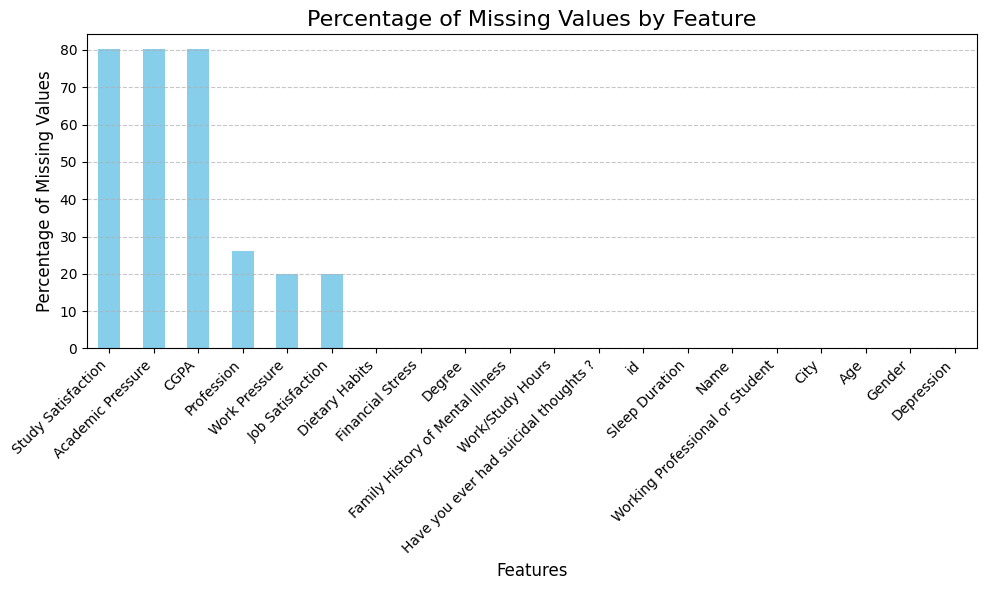

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
# train_dataframe = pd.read_csv("your_dataset.csv")

# Calculate the percentage of missing values
missing_percentage = (train_dataframe.isnull().sum() / len(train_dataframe)) * 100

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue')  # Sort and plot as a bar chart
plt.title('Percentage of Missing Values by Feature', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate the x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for the y-axis
plt.tight_layout()  # Ensure layout fits properly

plt.savefig('img/missing_values.png', dpi=300)

plt.show()

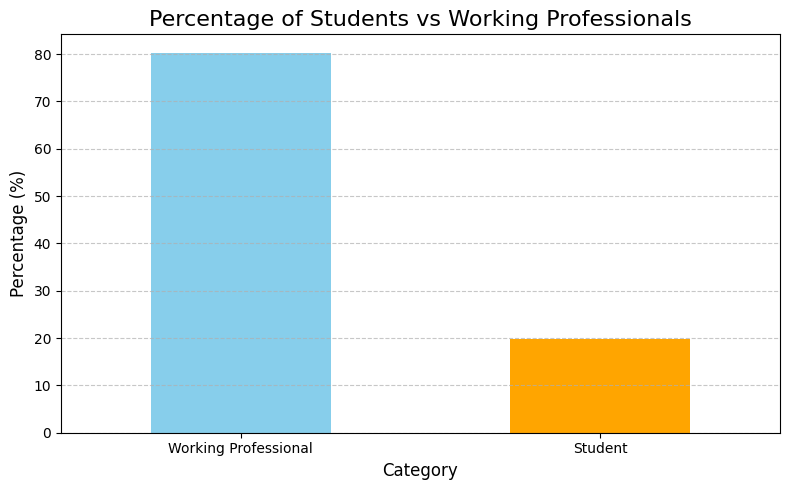

In [5]:
# Calculate percentages
category_percentages = (train_dataframe["Working Professional or Student"]
                        .value_counts(normalize=True) * 100)

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
category_percentages.plot(kind='bar', color=['skyblue', 'orange'])  # Bar chart for percentages
plt.title('Percentage of Students vs Working Professionals', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for the y-axis
plt.tight_layout()  # Ensure layout fits properly

# Save the plot
plt.savefig('img/dataset_composition.png', dpi=300)

plt.show()

In [6]:
#Binary features
train_dataframe['Gender'] = train_dataframe['Gender'].map({'Female': 0, 'Male': 1})  
train_dataframe['Working Professional or Student'] = train_dataframe['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})
train_dataframe['Have you ever had suicidal thoughts ?'] = train_dataframe['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
train_dataframe['Family History of Mental Illness'] = train_dataframe['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

If you are a working professional and have no profession, it's unknown.
If you are a student and have no profession, replace it to student

In [7]:
#if 'Working Professional or Student' is 'Student' (0) and profession is NaN, replace it with 'Student'
train_dataframe.loc[
    (train_dataframe['Working Professional or Student'] == 0) & (train_dataframe['Profession'].isna()), 
    'Profession'
] = 'Student'

#fill NaN professions with 'Unknown'
train_dataframe['Profession'] = train_dataframe['Profession'].fillna('Unknown')

In [9]:
#preparing to merge

train_dataframe['Academic Pressure'].fillna(0, inplace=True)
train_dataframe['Work Pressure'].fillna(0, inplace=True)
train_dataframe['Study Satisfaction'].fillna(0, inplace=True)
train_dataframe['Job Satisfaction'].fillna(0, inplace=True)

In [14]:
train_dataframe

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,0.0,0.738095,Ludhiana,1.0,Chef,NaN,More than 8 hours,Healthy,BHM,0.0,0.083333,0.25,0.0,0.0,1.0,0.4
1,1,Vivan,1.0,0.190476,Varanasi,1.0,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,1.0,0.583333,0.50,0.0,1.0,0.8,0.6
2,2,Yuvraj,1.0,0.357143,Visakhapatnam,0.0,Student,0.792757,5-6 hours,Healthy,B.Pharm,1.0,0.250000,0.00,0.0,1.0,1.0,0.4
3,3,Yuvraj,1.0,0.095238,Mumbai,1.0,Teacher,NaN,Less than 5 hours,Moderate,BBA,1.0,0.833333,0.00,1.0,1.0,1.0,0.2
4,4,Rhea,0.0,0.285714,Kanpur,1.0,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,1.0,0.750000,0.75,1.0,0.0,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,0.0,0.000000,Ahmedabad,1.0,Unknown,NaN,5-6 hours,Unhealthy,Class 12,0.0,0.166667,0.75,1.0,1.0,1.0,0.8
140696,140696,Lata,0.0,0.547619,Hyderabad,1.0,Content Writer,NaN,7-8 hours,Moderate,B.Tech,1.0,0.500000,1.00,1.0,0.0,1.0,0.8
140697,140697,Aanchal,0.0,0.142857,Kolkata,1.0,Marketing Manager,NaN,More than 8 hours,Moderate,B.Com,0.0,0.333333,0.75,0.0,0.0,0.6,0.2
140698,140698,Prachi,0.0,0.738095,Srinagar,1.0,Plumber,NaN,5-6 hours,Moderate,ME,1.0,0.833333,0.00,0.0,0.0,1.0,0.4


In [11]:
def merge_values(value1, value2):
    if value1 != 0 and value2 != 0:
        return (value1 + value2) / 2  # Average if both are non-zero
    elif value1 != 0:
        return value1  # Use value1 if value2 is zero
    else:
        return value2  # Use value2 if value1 is zero

# Apply the function to create the new columns
train_dataframe['Pressure'] = train_dataframe.apply(
    lambda row: merge_values(row['Academic Pressure'], row['Work Pressure']), axis=1
)
train_dataframe['Satisfaction'] = train_dataframe.apply(
    lambda row: merge_values(row['Study Satisfaction'], row['Job Satisfaction']), axis=1
)

# Drop the original columns
train_dataframe.drop(['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)


In [13]:
#normalizing before marking missing CGPA with -1
from sklearn.preprocessing import MinMaxScaler

numeric_columns = train_dataframe.select_dtypes(include=['int', 'float', 'int64', 'float64']).columns
numeric_columns = numeric_columns.drop('id')

# Apply MinMaxScaler to normalize values in the range [0, 1]
scaler = MinMaxScaler()
train_dataframe[numeric_columns] = scaler.fit_transform(train_dataframe[numeric_columns])

In [15]:
#fill CGPA with -1
train_dataframe['CGPA'].fillna(-1, inplace=True)

In [17]:
train_dataframe.dropna(inplace=True)

In [18]:
train_dataframe.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64

One-Hot Encoding

In [20]:
#add new category for cities
frequency = train_dataframe['City'].value_counts()
category_mapping = {category: ('Others' if count < 1000 else category) for category, count in frequency.items()}
train_dataframe['City'] = train_dataframe['City'].map(category_mapping)

In [21]:
#add other category for professions
frequency = train_dataframe['Profession'].value_counts()
category_mapping = {category: ('Others' if count < 300 else category) for category, count in frequency.items()}
train_dataframe['Profession'] = train_dataframe['Profession'].map(category_mapping)

In [22]:

# Define the mapping dictionary
mapping = {
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': 'Less than 5 hours',
    '4-6 hours': 'Less than 5 hours',
    '2-3 hours': 'Less than 5 hours',
    'Less than 5 hours': 'Less than 5 hours',
    '5-6 hours': '5-8 hours',
    '6-7 hours': '5-8 hours',
    '7-8 hours': '5-8 hours',
    'More than 8 hours': 'More than 8 hours'
}

# Apply the mapping
train_dataframe['Sleep Duration'] = train_dataframe['Sleep Duration'].map(mapping)

# Map all remaining rows (NaN after mapping) to 'Less than 5 hours'
train_dataframe['Sleep Duration'] = train_dataframe['Sleep Duration'].fillna('Less than 5 hours')


In [23]:
#mapping diatary habits less than 1000 to Unhealthy

frequency = train_dataframe['Dietary Habits'].value_counts()
category_mapping = {category: ('Unhealthy' if count < 1000 else category) for category, count in frequency.items()}
train_dataframe['Dietary Habits'] = train_dataframe['Dietary Habits'].map(category_mapping)

In [24]:
#degree
frequency = train_dataframe['Degree'].value_counts()
category_mapping = {category: ('Others' if count < 1000 else category) for category, count in frequency.items()}
train_dataframe['Degree'] = train_dataframe['Degree'].map(category_mapping)

In [27]:
from sklearn.compose import ColumnTransformer

def OH_encoding(cleaned_dataframe):
    categorical_columns = ['City', 'Profession', 'Dietary Habits', 'Degree', 'Sleep Duration']

    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(drop=None, sparse_output=False), categorical_columns)
        ],
        remainder='passthrough'  # Keep other columns as they are
    )

    # Apply the transformer to the data
    transformed_data = preprocessor.fit_transform(cleaned_dataframe)

    # Extract feature names for the encoded columns
    encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_columns).tolist()

    # Convert the transformed data into a DataFrame
    transformed_df = pd.DataFrame(transformed_data, columns=encoded_columns + [col for col in cleaned_dataframe.columns if col not in categorical_columns])

    columns_order = ['id', 'Name'] + [col for col in transformed_df.columns if col not in ['id', 'Name']]
    reordered_df = transformed_df[columns_order]
        
    # converting all columns to int except for CGPA
    columns_to_convert = [col for col in reordered_df.columns if col not in ['CGPA', 'Name', 'Academic Pressure', 'Work Pressure', 'Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Satisfaction', 'Work/Study Hours', 'Financial Stress']]
    reordered_df[columns_to_convert] = reordered_df[columns_to_convert].astype(int)
    
    # columns_to_convert = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
    # reordered_df[columns_to_convert] = reordered_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

    
    return reordered_df

In [28]:
dataset = OH_encoding(train_dataframe)

In [29]:
dataset

,id,Name,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,...,Age,Working Professional or Student,CGPA,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,0,0,0,0,0,0,0,0,...,0,1,-1.0,0,0.083333,0.25,0,0,1.0,0.4
1,1,Vivan,0,0,0,0,0,0,0,0,...,0,1,-1.0,1,0.583333,0.5,0,1,0.8,0.6
2,2,Yuvraj,0,0,0,0,0,0,0,0,...,0,0,0.792757,1,0.25,0.0,0,1,1.0,0.4
3,3,Yuvraj,0,0,0,0,0,0,0,0,...,0,1,-1.0,1,0.833333,0.0,1,1,1.0,0.2
4,4,Rhea,0,0,0,0,0,0,0,0,...,0,1,-1.0,1,0.75,0.75,1,0,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140695,Vidya,0,1,0,0,0,0,0,0,...,0,1,-1.0,0,0.166667,0.75,1,1,1.0,0.8
140686,140696,Lata,0,0,0,0,0,0,0,0,...,0,1,-1.0,1,0.5,1.0,1,0,1.0,0.8
140687,140697,Aanchal,0,0,0,0,0,0,0,0,...,0,1,-1.0,0,0.333333,0.75,0,0,0.6,0.2
140688,140698,Prachi,0,0,0,0,0,0,0,0,...,0,1,-1.0,1,0.833333,0.0,0,0,1.0,0.4


In [30]:
# dataset.to_csv('data/merged_dataset.csv', index=False)